Ici, on fera une analyse des textes qui nous sont proposées


In [4]:
import re
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

On va importer ci-dessous nos données

In [5]:
with open("data/raw_data/small_vocab_fr.txt", "r", encoding="utf-8") as f:
    fr_data = f.read()

with open("data/raw_data/small_vocab_en.txt", "r", encoding="utf-8") as f:
    en_data = f.read()

On tokenize nos données ici

In [6]:
tokens_fr = re.findall(r"\b\w+\b", fr_data.lower())
tokens_en = re.findall(r"\b\w+\b", en_data.lower())

In [7]:
occurrence_fr, occurrence_en = {}, {}

# On verifie le nombre d'occurence de chaque token pour les deux corpus de texte
for word in tokens_fr:
    if word not in occurrence_fr:
        occurrence_fr[word] = 0
    occurrence_fr[word] += 1

for word in tokens_en:
    if word not in occurrence_en:
        occurrence_en[word] = 0
    occurrence_en[word] += 1


occurrence_fr = dict(sorted(occurrence_fr.items(), key=lambda item: item[1], reverse=True))
occurrence_en = dict(sorted(occurrence_en.items(), key=lambda item: item[1], reverse=True))

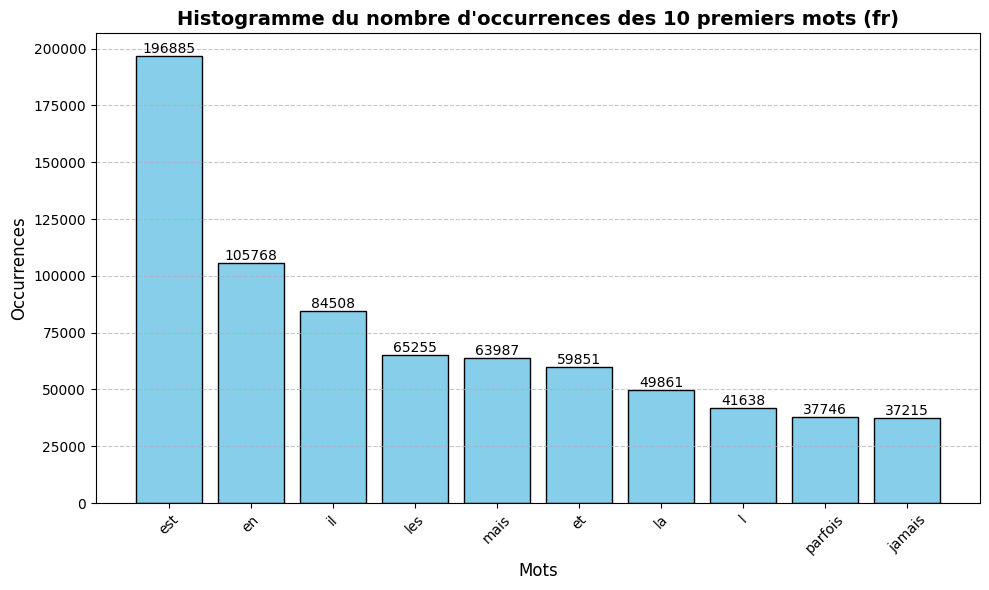

In [8]:
x, y = list(occurrence_fr.keys()), list(occurrence_fr.values())
plt.figure(figsize=(10,6))  # taille plus grande

bars = plt.bar(x[:10], y[:10], color="skyblue", edgecolor="black")

# Titre et labels
plt.title("Histogramme du nombre d'occurrences des 10 premiers mots (fr)", fontsize=14, fontweight="bold")
plt.xlabel("Mots", fontsize=12)
plt.ylabel("Occurrences", fontsize=12)

# Rotation des mots sur l'axe X pour lisibilité
plt.xticks(rotation=45)

# Ajouter les valeurs au-dessus des barres
for bar in bars:
    plt.text(
        bar.get_x() + bar.get_width()/2,   # position horizontale (milieu de la barre)
        bar.get_height() + 0.2,           # position verticale (juste au-dessus)
        str(bar.get_height()),            # valeur à afficher
        ha="center", va="bottom", fontsize=10
    )

# Grille horizontale pour mieux lire
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.tight_layout()
plt.show()


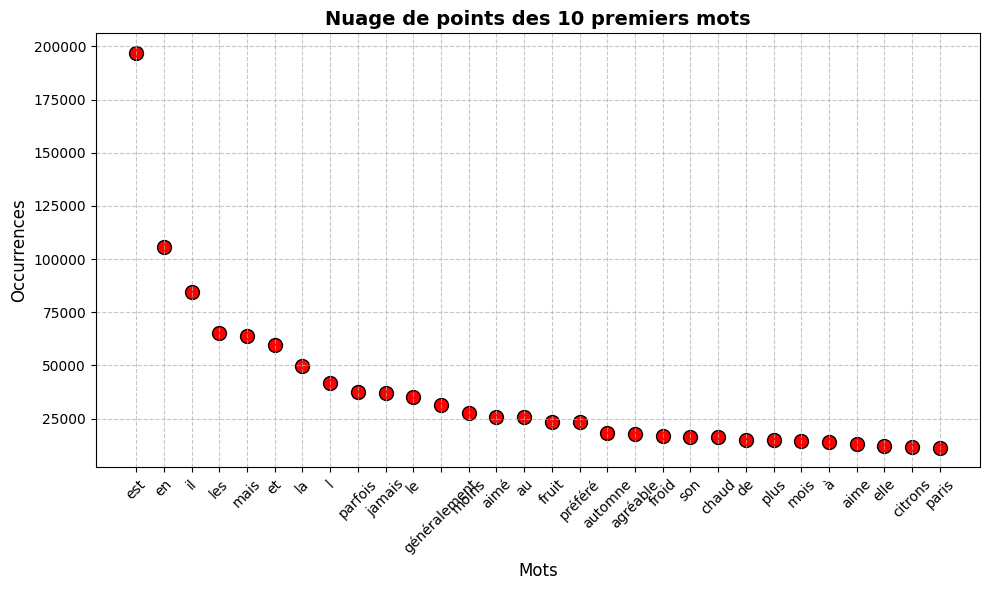

In [9]:
# Scatter plot
plt.figure(figsize=(10,6))
n = 30 # Nombre de mots maximal
# On mappe les mots sur l'axe X avec leurs indices
indices = range(len(x[:n]))
plt.scatter(indices, y[:n], color="red", s=100, edgecolor="black")
plt.xticks(indices, x[:n], rotation=45)
plt.title("Nuage de points des 10 premiers mots", fontsize=14, fontweight="bold")
plt.xlabel("Mots", fontsize=12)
plt.ylabel("Occurrences", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()


Formule de la loi de Zipf :

$$f_r = \frac{1}{r^s} /H_{N,s} $$

$s$ est l'exposant

$N$ nombre total de mots (ou de rangs qu’on veut afficher)

$H_{N,s} = \sum_{k=1}^{N} \frac{1}{k^{s}}$ constante de normalisation pour que les fréquences $f_r$ soient proportionnelles à 1

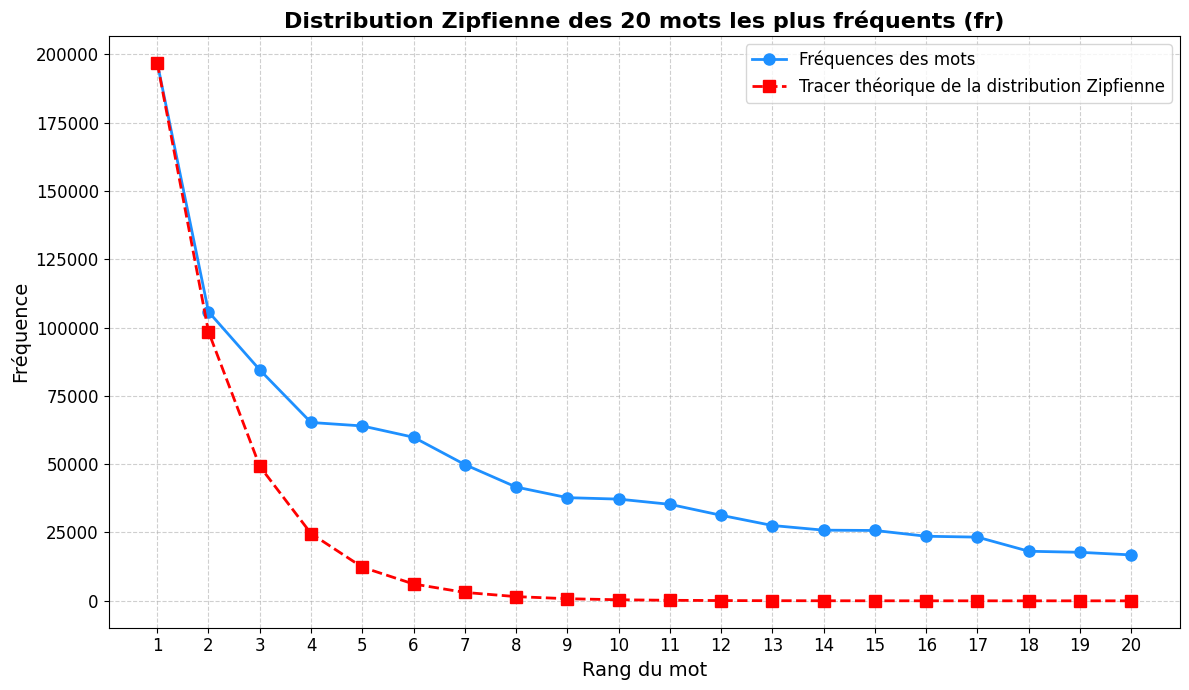

In [10]:
n = 20  # nombre de mots à tracer
y_top = y[:n]  # fréquences réelles des 20 premiers mots
ranks = np.arange(1, n+1)  # rangs correspondants
u_n = []
def u(n, u0):
    return 2**(-n) * u0
for i in range(n):
    u_n.append(u(i,y_top[0]))
# Tracer la distribution Zipfienne

plt.figure(figsize=(12,7))

plt.plot(range(1, n+1), y[:n], marker="o", linestyle="-", color="dodgerblue", markersize=8, linewidth=2, label = "Fréquences des mots")
plt.plot(range(1, n+1), u_n, marker="s", linestyle="--", color="red", markersize=8, linewidth=2, label = "Tracer théorique de la distribution Zipfienne")


plt.title("Distribution Zipfienne des 20 mots les plus fréquents (fr)", fontsize=16, fontweight="bold")
plt.xlabel("Rang du mot", fontsize=14)
plt.ylabel("Fréquence", fontsize=14)




plt.grid(True, which="both", linestyle="--", alpha=0.6)

plt.xticks(range(1, n+1))
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()


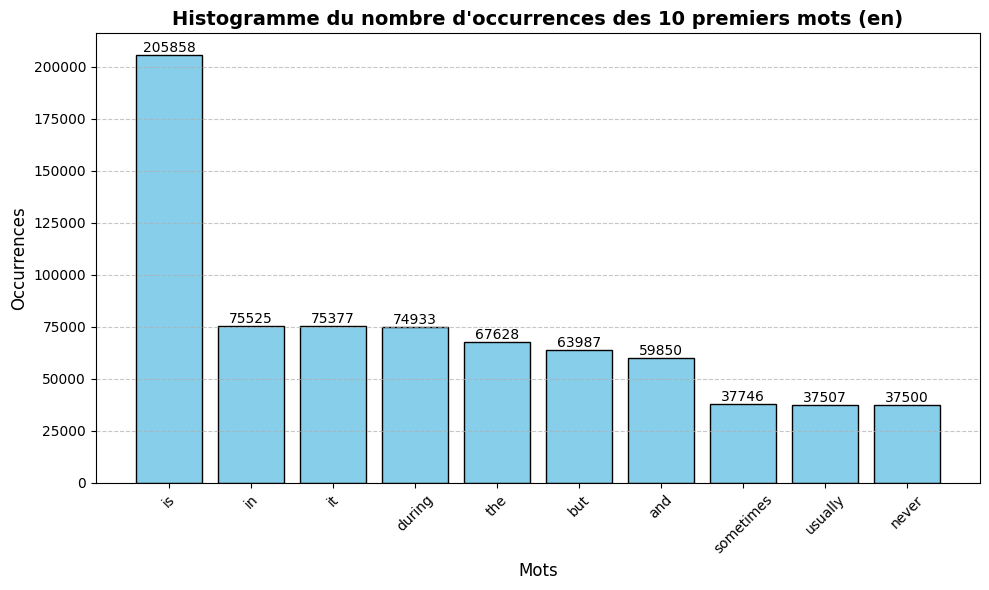

In [11]:
x, y = list(occurrence_en.keys()), list(occurrence_en.values())
plt.figure(figsize=(10,6))  # taille plus grande

bars = plt.bar(x[:10], y[:10], color="skyblue", edgecolor="black")

# Titre et labels
plt.title("Histogramme du nombre d'occurrences des 10 premiers mots (en)", fontsize=14, fontweight="bold")
plt.xlabel("Mots", fontsize=12)
plt.ylabel("Occurrences", fontsize=12)

# Rotation des mots sur l'axe X pour lisibilité
plt.xticks(rotation=45)

# Ajouter les valeurs au-dessus des barres
for bar in bars:
    plt.text(
        bar.get_x() + bar.get_width()/2,   # position horizontale (milieu de la barre)
        bar.get_height() + 0.2,           # position verticale (juste au-dessus)
        str(bar.get_height()),            # valeur à afficher
        ha="center", va="bottom", fontsize=10
    )

# Grille horizontale pour mieux lire
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.tight_layout()
plt.show()


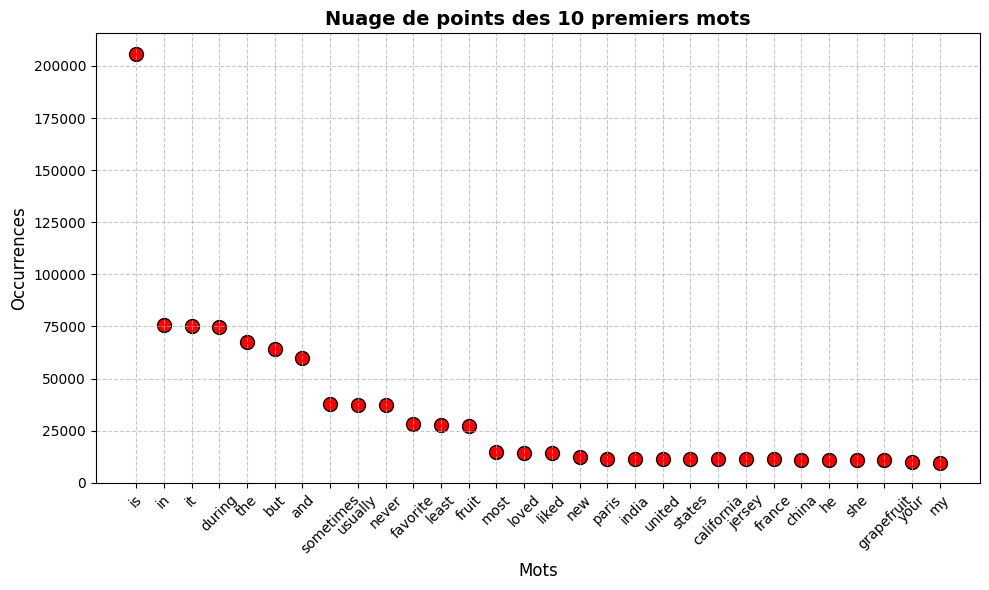

In [12]:
# Scatter plot
plt.figure(figsize=(10,6))
n = 30 # Nombre de mots maximal
# On mappe les mots sur l'axe X avec leurs indices
indices = range(len(x[:n]))
plt.scatter(indices, y[:n], color="red", s=100, edgecolor="black")
plt.xticks(indices, x[:n], rotation=45)
plt.title("Nuage de points des 10 premiers mots", fontsize=14, fontweight="bold")
plt.xlabel("Mots", fontsize=12)
plt.ylabel("Occurrences", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()


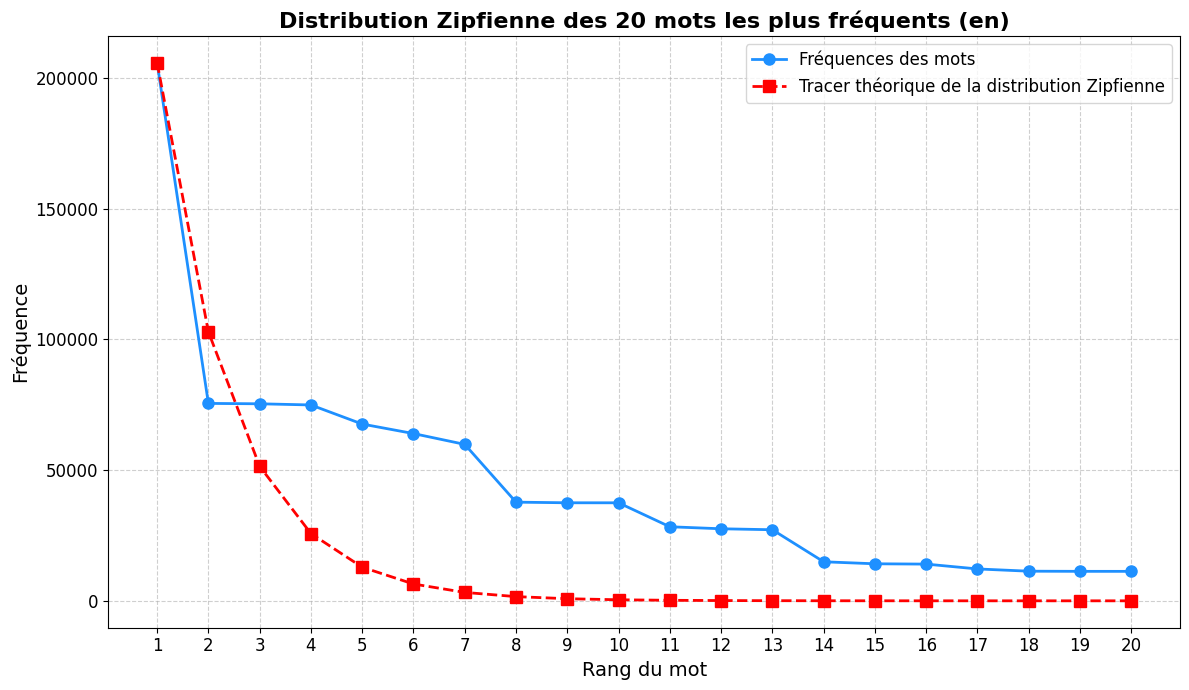

In [13]:
n = 20  # nombre de mots à tracer
y_top = y[:n]  # fréquences réelles des 20 premiers mots
ranks = np.arange(1, n+1)  # rangs correspondants
u_n = []
def u(n, u0):
    return 2**(-n) * u0
for i in range(n):
    u_n.append(u(i,y_top[0]))
plt.figure(figsize=(12,7))

plt.plot(range(1, n+1), y[:n], marker="o", linestyle="-", color="dodgerblue", markersize=8, linewidth=2, label = "Fréquences des mots")
plt.plot(range(1, n+1), u_n, marker="s", linestyle="--", color="red", markersize=8, linewidth=2, label = "Tracer théorique de la distribution Zipfienne")


plt.title("Distribution Zipfienne des 20 mots les plus fréquents (en)", fontsize=16, fontweight="bold")
plt.xlabel("Rang du mot", fontsize=14)
plt.ylabel("Fréquence", fontsize=14)




plt.grid(True, which="both", linestyle="--", alpha=0.6)

plt.xticks(range(1, n+1))
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()


# Analyse de la longeur des mots et des phrases (utile pour definir la taille maximal des sequences)

In [14]:
length_fr, length_en = [], []
for token in tokens_fr:
    length_fr.append(len(token))
for token in tokens_en:
    length_en.append(len(token))

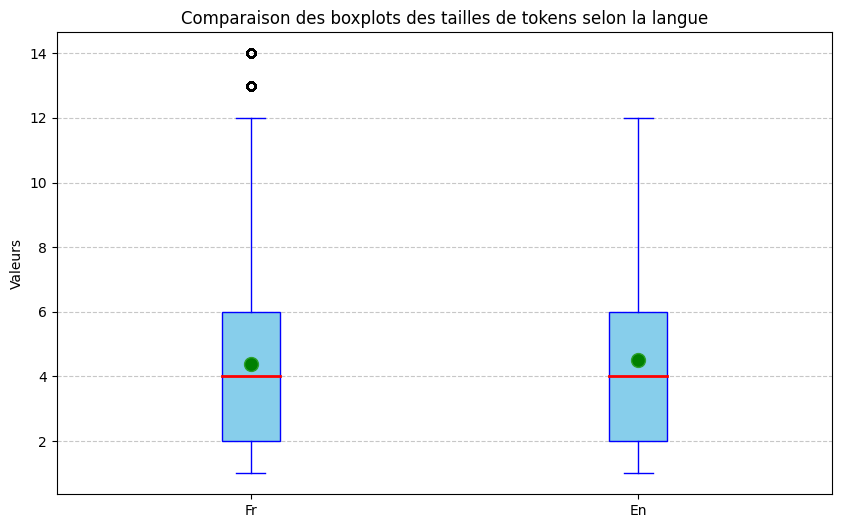

In [15]:
data = [length_fr, length_en]

plt.figure(figsize=(10,6))
plt.boxplot(data, patch_artist=True,
            showmeans=True,
            meanprops=dict(marker='o', markerfacecolor='green', markersize=10, label='Moyenne'),
            boxprops=dict(facecolor='skyblue', color='blue'),
            whiskerprops=dict(color='blue'),
            capprops=dict(color='blue'),
            medianprops=dict(color='red', linewidth=2))

plt.xticks([1, 2], ['Fr', 'En'])
plt.title("Comparaison des boxplots des tailles de tokens selon la langue")
plt.ylabel("Valeurs")
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()